In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import manifold

import p5Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import p5Lib

from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score
from sklearn.base import BaseEstimator
from scipy.cluster.hierarchy import linkage
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv(r'Flipkart/flipkart_com-ecommerce_sample_1050.csv')

## 1. Prétraitement description

In [3]:
df.description

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

## 1.1 Tokenisation

Différences entre un split() et word_tokenize() de NLTK :
* split() va automatiquement supprimer les ponctuations (sauf les parenthèse)
* word_tokenize() va séparer les mots et les ponctuations (même les parenthèse), ne supprimant aucun caractères. 


In [4]:
df.description.map(lambda x: x.split())[0]

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain,Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 '(213',
 'cm',
 'in',
 'Height,',
 'Pack',
 'of',
 '2)',
 'Price:',
 'Rs.',
 '899',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.This',
 'curtain',
 'is',
 'made',
 'from',
 '100%',
 'high',
 'quality',
 'polyester',
 'fabric.It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring.It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.This',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs.',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts.',
 'These',
 'contemporary',
 'eyelet',
 'and',
 'val

In [5]:
df.description.map(lambda x: nltk.word_tokenize(x))[0]

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain',
 ',',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 '(',
 '213',
 'cm',
 'in',
 'Height',
 ',',
 'Pack',
 'of',
 '2',
 ')',
 'Price',
 ':',
 'Rs',
 '.',
 '899',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors.This',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 '%',
 'high',
 'quality',
 'polyester',
 'fabric.It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring.It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving.This',
 'curtain',
 'is',
 'ant-',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance.Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 '.',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 '.',
 

In [6]:
desc_token = df.description.map(lambda x: nltk.word_tokenize(x))
desc_token

0       [Key, Features, of, Elegance, Polyester, Multi...
1       [Specifications, of, Sathiyas, Cotton, Bath, T...
2       [Key, Features, of, Eurospa, Cotton, Terry, Fa...
3       [Key, Features, of, SANTOSH, ROYAL, FASHION, C...
4       [Key, Features, of, Jaipur, Print, Cotton, Flo...
                              ...                        
1045    [Oren, Empower, Extra, Large, Self, Adhesive, ...
1046    [Wallmantra, Large, Vinyl, Sticker, Sticker, (...
1047    [Buy, Uberlyfe, Extra, Large, Pigmented, Polyv...
1048    [Buy, Wallmantra, Medium, Vinyl, Sticker, Stic...
1049    [Buy, Uberlyfe, Large, Vinyl, Sticker, for, Rs...
Name: description, Length: 1050, dtype: object

## 1.2 Normalisation

Nous allons imputer les signes de ponctuations en selectionnant que les caratères alphanumériques.

In [7]:
tokenizer_alphaNum = nltk.RegexpTokenizer(r'\w+')
desc_token_norm = df.description.map(lambda x: tokenizer_alphaNum.tokenize(x))
desc_token_norm

0       [Key, Features, of, Elegance, Polyester, Multi...
1       [Specifications, of, Sathiyas, Cotton, Bath, T...
2       [Key, Features, of, Eurospa, Cotton, Terry, Fa...
3       [Key, Features, of, SANTOSH, ROYAL, FASHION, C...
4       [Key, Features, of, Jaipur, Print, Cotton, Flo...
                              ...                        
1045    [Oren, Empower, Extra, Large, Self, Adhesive, ...
1046    [Wallmantra, Large, Vinyl, Sticker, Sticker, P...
1047    [Buy, Uberlyfe, Extra, Large, Pigmented, Polyv...
1048    [Buy, Wallmantra, Medium, Vinyl, Sticker, Stic...
1049    [Buy, Uberlyfe, Large, Vinyl, Sticker, for, Rs...
Name: description, Length: 1050, dtype: object

In [8]:
word_counts = pd.value_counts(desc_token_norm.apply(pd.Series).stack())

In [9]:
word_counts[:25]

of             1663
and            1167
the            1015
to              983
Rs              911
for             825
in              759
Only            717
at              701
with            688
For             604
your            600
is              579
Products        577
Buy             566
Genuine         564
a               558
1               554
cm              538
Replacement     520
30              498
Day             478
Flipkart        475
com             473
Guarantee       469
dtype: int64

In [10]:
(word_counts / desc_token_norm.count())[:20]

of             1.583810
and            1.111429
the            0.966667
to             0.936190
Rs             0.867619
for            0.785714
in             0.722857
Only           0.682857
at             0.667619
with           0.655238
For            0.575238
your           0.571429
is             0.551429
Products       0.549524
Buy            0.539048
Genuine        0.537143
a              0.531429
1              0.527619
cm             0.512381
Replacement    0.495238
dtype: float64

supprimer les mots entre parenthèse?

### 1.2.1 Suppression des Stopwords

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
desc_token_norm_stopWords = desc_token_norm.map(lambda x: [w for w in x if not w.lower() in stop_words])
desc_token_norm_stopWords

0       [Key, Features, Elegance, Polyester, Multicolo...
1       [Specifications, Sathiyas, Cotton, Bath, Towel...
2       [Key, Features, Eurospa, Cotton, Terry, Face, ...
3       [Key, Features, SANTOSH, ROYAL, FASHION, Cotto...
4       [Key, Features, Jaipur, Print, Cotton, Floral,...
                              ...                        
1045    [Oren, Empower, Extra, Large, Self, Adhesive, ...
1046    [Wallmantra, Large, Vinyl, Sticker, Sticker, P...
1047    [Buy, Uberlyfe, Extra, Large, Pigmented, Polyv...
1048    [Buy, Wallmantra, Medium, Vinyl, Sticker, Stic...
1049    [Buy, Uberlyfe, Large, Vinyl, Sticker, Rs, 595...
Name: description, Length: 1050, dtype: object

### 1.2.2 Lemmatisation

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
desc_token_norm_stopWords_lemm = desc_token_norm_stopWords.map(lambda x: [lemmatizer.lemmatize(w.lower()) for w in x])
desc_token_norm_stopWords_lemm

0       [key, feature, elegance, polyester, multicolor...
1       [specification, sathiyas, cotton, bath, towel,...
2       [key, feature, eurospa, cotton, terry, face, t...
3       [key, feature, santosh, royal, fashion, cotton...
4       [key, feature, jaipur, print, cotton, floral, ...
                              ...                        
1045    [oren, empower, extra, large, self, adhesive, ...
1046    [wallmantra, large, vinyl, sticker, sticker, p...
1047    [buy, uberlyfe, extra, large, pigmented, polyv...
1048    [buy, wallmantra, medium, vinyl, sticker, stic...
1049    [buy, uberlyfe, large, vinyl, sticker, r, 595,...
Name: description, Length: 1050, dtype: object

In [15]:
word_counts2 = pd.value_counts(desc_token_norm_stopWords_lemm.apply(pd.Series).stack())

In [16]:
word_counts2[:30]

r                927
product          864
free             618
buy              581
cm               568
delivery         567
cash             564
shipping         564
genuine          564
price            561
replacement      559
1                554
day              553
30               498
flipkart         481
com              473
guarantee        471
mug              457
feature          404
online           396
specification    379
color            369
watch            355
type             325
baby             321
pack             319
material         313
set              311
cotton           299
box              297
dtype: int64

### 1.2.3 N-Gram

Bigram:

In [17]:
desc_token_norm_stopWords_lemm_biGram = desc_token_norm_stopWords_lemm.map(lambda x: list(nltk.bigrams(x)))
desc_token_norm_stopWords_lemm_biGram

0       [(key, feature), (feature, elegance), (eleganc...
1       [(specification, sathiyas), (sathiyas, cotton)...
2       [(key, feature), (feature, eurospa), (eurospa,...
3       [(key, feature), (feature, santosh), (santosh,...
4       [(key, feature), (feature, jaipur), (jaipur, p...
                              ...                        
1045    [(oren, empower), (empower, extra), (extra, la...
1046    [(wallmantra, large), (large, vinyl), (vinyl, ...
1047    [(buy, uberlyfe), (uberlyfe, extra), (extra, l...
1048    [(buy, wallmantra), (wallmantra, medium), (med...
1049    [(buy, uberlyfe), (uberlyfe, large), (large, v...
Name: description, Length: 1050, dtype: object

### 1.2.4 TF-IDF

In [18]:
tfidf = TfidfVectorizer()

In [19]:
#Création d'une liste de tous les bigrames
list_all = []
for liste in desc_token_norm_stopWords_lemm_biGram.values:
    list_all.extend(liste)
set(list_all)

{('girl', 'outer'),
 ('bright', 'modernistic'),
 ('spoon', 'aroma'),
 ('carpet', 'best'),
 ('carefully', 'made'),
 ('mug', 'adorable'),
 ('distribute', 'weight'),
 ('design', 'style'),
 ('sailor', 'made'),
 ('finest', 'combed'),
 ('aid', 'filling'),
 ('red', 'yellow'),
 ('pocket', 'front'),
 ('bedsheet', 'made'),
 ('detail', 'dessert'),
 ('12', 'specification'),
 ('heavy', 'look'),
 ('681gm_wht', 'online'),
 ('wear', 'includes'),
 ('rce', 'hp'),
 ('come', 'convenient'),
 ('cover', '170cmx68cm'),
 ('lining', 'material'),
 ('pa', 'r'),
 ('holder', '2'),
 ('class', 'otherwise'),
 ('80', 'cm'),
 ('multifunction', 'kitchen'),
 ('capacity', 'material'),
 ('niko', 'male'),
 ('white', 'r'),
 ('handmade', 'yes'),
 ('general', 'shape'),
 ('r', '1149'),
 ('clay', 'finish'),
 ('suspended', 'write'),
 ('ordered', 'aware'),
 ('help', 'clear'),
 ('specification', 'huppmegift'),
 ('plain', 'model'),
 ('also', 'install'),
 ('plastic', 'case'),
 ('connector', 'r'),
 ('charger', 'vaio'),
 ('bling', 'styl

In [20]:
uniqueBiGram = set(list_all)

In [21]:
x = tfidf.fit_transform(df.description)

In [22]:
x.shape

(1050, 6053)

In [23]:
x

<1050x6053 sparse matrix of type '<class 'numpy.float64'>'
	with 46143 stored elements in Compressed Sparse Row format>

In [24]:
print(x)

  (0, 3620)	0.02431335218365629
  (0, 2040)	0.028220704477878087
  (0, 1297)	0.03456127412150089
  (0, 4098)	0.047495081891693
  (0, 4825)	0.047495081891693
  (0, 1795)	0.027688416374410784
  (0, 3957)	0.0237475409458465
  (0, 1336)	0.02248656679083006
  (0, 3415)	0.03416210628004184
  (0, 2091)	0.02743333944457113
  (0, 1689)	0.023789856590843754
  (0, 2209)	0.06716583530068437
  (0, 3056)	0.036523029610729875
  (0, 4933)	0.026649826089009194
  (0, 3864)	0.03118225049069166
  (0, 3740)	0.05449309235304021
  (0, 5672)	0.02345663305747058
  (0, 2611)	0.011838645923971988
  (0, 2041)	0.036523029610729875
  (0, 1349)	0.024224018616305337
  (0, 2726)	0.02131199576577263
  (0, 5186)	0.019900640086178614
  (0, 5353)	0.06341692425456386
  (0, 928)	0.06075702953706915
  (0, 4719)	0.04853613809734959
  :	:
  (1049, 5677)	0.5655102705347235
  (1049, 5805)	0.40123579910814494
  (1049, 5257)	0.40123579910814494
  (1049, 3372)	0.4224936285666613
  (1049, 4408)	0.10840521306105436
  (1049, 1231)	0.1

In [25]:
features_names = tfidf.get_feature_names()
features_names

['00',
 '000',
 '001',
 '0021',
 '004',
 '005',
 '006',
 '0083',
 '01',
 '011',
 '01433cmgy',
 '01727lpln',
 '01741lpln',
 '01784bmly',
 '02',
 '03',
 '03918cmly',
 '04',
 '04615cmgy',
 '050',
 '052',
 '05712lmly',
 '05tg',
 '06',
 '063',
 '06362cmgy',
 '064',
 '069',
 '07',
 '07034lmli',
 '074',
 '08',
 '085',
 '09',
 '09321cmgy',
 '099',
 '10',
 '100',
 '1000',
 '1001',
 '10024982',
 '1008ax',
 '101',
 '1010',
 '1014tx',
 '1015',
 '1015nr',
 '101b0101',
 '1020el',
 '1033',
 '1038',
 '104',
 '1042',
 '1045',
 '1049',
 '105key',
 '107',
 '1071',
 '1075',
 '107750',
 '108',
 '1080',
 '1085',
 '10890',
 '1092',
 '1099',
 '109b0109',
 '10btsc2012gb',
 '11',
 '110',
 '1100',
 '11000026',
 '111',
 '112',
 '1132',
 '1141ym22',
 '1142301',
 '1143',
 '1148',
 '1149',
 '1150',
 '1153',
 '1155',
 '1170',
 '1183',
 '119',
 '1195',
 '1199',
 '11n',
 '11oz',
 '12',
 '120',
 '1200',
 '12011ppgw',
 '121',
 '1216',
 '122',
 '1234',
 '12399',
 '1240sg',
 '1241ea',
 '125',
 '125g',
 '125prog',
 '126',
 

In [26]:
dense = x.todense()

In [27]:
denselist = dense.tolist()

In [28]:
tfidf_matrix = pd.DataFrame(denselist, columns=features_names)
tfidf_matrix

,00,000,001,0021,004,005,006,0083,01,011,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
tfidf2 = TfidfVectorizer(ngram_range=(2,2))

In [30]:
x2 = tfidf2.fit_transform(df.description)

In [31]:
features_names2 = tfidf2.get_feature_names()
dense2 = x2.todense()
denselist2 = dense2.tolist()
tfidf_matrix2 = pd.DataFrame(denselist2, columns=features_names2)

In [32]:
tfidf_matrix2.max()

00 type          0.063463
000 sq           0.095850
001 material     0.161354
001 usb          0.073530
0021 in          0.078174
                   ...   
zoom type        0.072754
zora laptop      0.314099
zyxel 3d         0.318742
zyxel pla        0.375844
zyxel vmg1312    0.271443
Length: 23844, dtype: float64

In [33]:
from yellowbrick.text import TSNEVisualizer

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


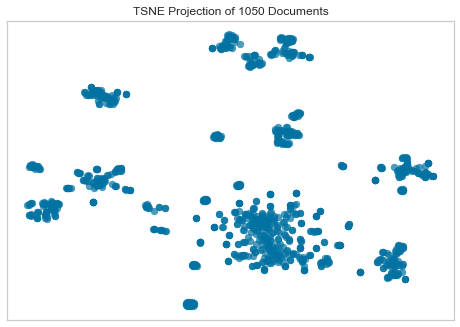

In [34]:
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix2)
tsne.show();

Word2Vec à faire?

## Avec Tensorflow Keras

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [36]:
tokenizer = Tokenizer(num_words=100) #prend en compte les 100 premiers mots les plus utilisés
tokenizer.fit_on_texts(df.description)

In [37]:
tokenizer.word_index

{'of': 1,
 'for': 2,
 'the': 3,
 'and': 4,
 'in': 5,
 'to': 6,
 'rs': 7,
 'only': 8,
 'with': 9,
 'on': 10,
 '\r': 11,
 'at': 12,
 'a': 13,
 'your': 14,
 'is': 15,
 'products': 16,
 'free': 17,
 'buy': 18,
 'delivery': 19,
 'genuine': 20,
 'shipping': 21,
 'cash': 22,
 'replacement': 23,
 '1': 24,
 'cm': 25,
 'day': 26,
 '30': 27,
 'flipkart': 28,
 'com': 29,
 'guarantee': 30,
 'this': 31,
 'it': 32,
 'online': 33,
 'features': 34,
 'from': 35,
 'specifications': 36,
 'price': 37,
 'you': 38,
 'watch': 39,
 'color': 40,
 'mug': 41,
 'pack': 42,
 'baby': 43,
 'set': 44,
 'type': 45,
 'cotton': 46,
 'box': 47,
 'general': 48,
 '5': 49,
 'package': 50,
 'material': 51,
 'analog': 52,
 'sales': 53,
 'number': 54,
 'warranty': 55,
 'quality': 56,
 '3': 57,
 '2': 58,
 'details': 59,
 'brand': 60,
 'best': 61,
 'product': 62,
 'model': 63,
 'design': 64,
 'key': 65,
 'are': 66,
 'laptop': 67,
 'fabric': 68,
 'prices': 69,
 'be': 70,
 'showpiece': 71,
 'can': 72,
 'or': 73,
 'made': 74,
 'not'

In [38]:
tokenizer.texts_to_matrix(df.description)

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [39]:
sequences = tokenizer.texts_to_sequences(df.description)
print(sequences)

[[65, 34, 1, 95, 95, 25, 5, 42, 1, 58, 37, 7, 31, 3, 1, 3, 31, 15, 74, 35, 56, 68, 32, 34, 98, 9, 32, 3, 4, 31, 15, 4, 4, 14, 88, 13, 4, 9, 91, 3, 15, 6, 91, 4, 38, 5, 3, 6, 3, 38, 6, 6, 3, 4, 38, 5, 3, 38, 3, 1, 97, 3, 88, 3, 78, 5, 14, 78, 38, 3, 1, 36, 1, 95, 25, 5, 42, 1, 58, 48, 60, 2, 45, 63, 44, 1, 58, 63, 40, 95, 86, 25, 5, 3, 47, 54, 1, 99, 5, 53, 50, 42, 1, 58, 53, 50, 58, 64, 51], [36, 1, 46, 57, 34, 51, 46, 64, 64, 48, 60, 45, 63, 46, 87, 2, 82, 63, 40, 86, 27, 84, 84, 5, 3, 47, 54, 1, 99, 5, 53, 50, 57, 53, 50, 57], [65, 34, 1, 46, 44, 84, 46, 44, 44, 37, 7, 6, 38, 98, 46, 1, 56, 93, 16, 78, 1, 14, 89, 4, 38, 78, 38, 6, 1, 2, 4, 15, 2, 4, 62, 15, 46, 32, 15, 6, 62, 40, 35, 3, 97, 5, 75, 75, 36, 1, 46, 44, 44, 34, 51, 46, 64, 48, 60, 45, 44, 63, 87, 2, 82, 63, 40, 86, 84, 84, 5, 3, 47, 54, 1, 99, 5, 53, 50, 53, 50, 44], [65, 34, 1, 46, 2, 36, 1, 46, 24, 58, 95, 48, 60, 45, 51, 46, 63, 64, 46, 9, 58, 63, 40, 95, 68, 75, 86, 84, 25, 25, 84, 25, 84, 25, 25, 25, 25, 84, 25, 5, 

In [40]:
tokenizer = Tokenizer(num_words=100, oov_token='OOV') #pour les mots invisbles dans le test data

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
padded = pad_sequences(sequences, maxlen=5)

In [43]:
padded #ajuster la taille des input

array([[53, 50, 58, 64, 51],
       [50, 57, 53, 50, 57],
       [53, 50, 53, 50, 44],
       ...,
       [16, 27, 26, 23, 30],
       [16, 27, 26, 23, 30],
       [16, 27, 26, 23, 30]])

In [44]:
padded = pad_sequences(sequences, maxlen=5, padding='post', truncating='post') #padding ajout 0

### ++++++++++++++++++++++++++++++++++++++++++

In [45]:
df.description.str.replace(r'(\W+)', "")[0][0]

'K'

In [46]:
df.description.str.extract(r'(\w+)')[0][0]

'Key'

In [47]:
test = df.description[0]

In [48]:
test

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [49]:
re.sub(" \([^)]*\)", '', test)

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right amount of sunli

In [50]:
re.sub(" \w*[\d()]\w*", '', test)

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain cm in Height, Pack of Price: Rs. This curtain enhances the look of the interiors.This curtain is made from% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you get the right a

In [51]:
desc_noPrentheses = df.description.map(lambda x: re.sub(" \([^)]*\)", '', x))

In [52]:
desc_noPrentheses_noDigit = desc_noPrentheses.map(lambda x: re.sub(" \w*[\d]\w*", '', x))

In [53]:
desc_noPrentheses_noDigit2 = desc_noPrentheses_noDigit.map(lambda x: re.sub("^\d+\s|\s\d+\s|\s\d+$", '', x))

In [54]:
desc_noPrentheses_noDigit3 = desc_noPrentheses_noDigit2.map(lambda x: re.sub("[0-9]", '', x))

In [55]:
df.description[3]

'Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet (1 Bedsheet,2 Pillow Cover, Multicolor) General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With 2 Pillow cover Model ID goldbedi-38 Color Multicolor Size King Fabric Care Machine Wash, Do Not Bleach Dimensions Flat Sheet Width 90 inch / 230 cm Fitted Sheet Width 228 cm Pillow Cover Width 16 inch / 43 cm Pillow Cover Length 28 inch / 72 cm Fitted Sheet Depth 280 cm Fitted Sheet Length 278 cm Flat Sheet Depth 282 cm Flat Sheet Length 110 inch / 280 cm In the Box Number of Contents in Sales Package 1 Sales Package 1 Bedsheet,2 Pillow Cover'

In [56]:
desc_noPrentheses_noDigit[3]

'Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet Perfact for Wedding & Gifting,Specifications of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet General Brand SANTOSH ROYAL FASHION Machine Washable Yes Type Flat Material Cotton Model Name Gold Design Royal Cotton Printed Wedding & Gifted Double Bedsheet With Pillow cover Model ID goldbedi-38 Color Multicolor Size King Fabric Care Machine Wash, Do Not Bleach Dimensions Flat Sheet Width inch / cm Fitted Sheet Width cm Pillow Cover Width inch / cm Pillow Cover Length inch / cm Fitted Sheet Depth cm Fitted Sheet Length cm Flat Sheet Depth cm Flat Sheet Length inch / cm In the Box Number of Contents in Sales Package Sales Package Bedsheet,2 Pillow Cover'

In [57]:
desc_noPrentheses_noDigit_lemma = desc_noPrentheses_noDigit.map(lambda x: ' '.join([lemmatizer.lemmatize(w.lower()) for w in x.split()]))

In [58]:
tfidf3 = TfidfVectorizer(stop_words=stop_words,
                         ngram_range=(2,2))

In [59]:
x3 = tfidf3.fit_transform(desc_noPrentheses_noDigit3)

In [60]:
features_names3 = tfidf3.get_feature_names()
dense3 = x3.todense()
denselist3 = dense3.tolist()
tfidf_matrix3 = pd.DataFrame(denselist3, columns=features_names3)

In [61]:
df['main_cate'] = df.product_category_tree.map(lambda x: x[2:].split(sep='>>')[0])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

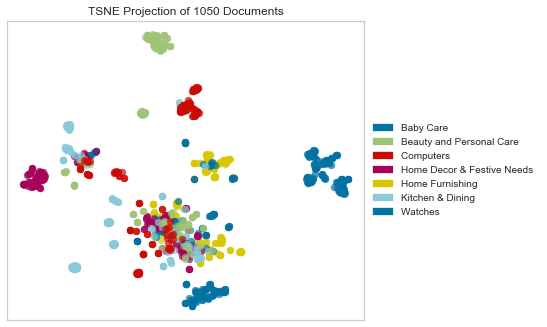

In [62]:
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix2, y=df.main_cate)
tsne.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

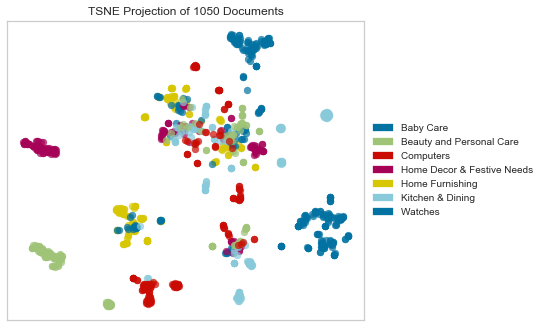

In [63]:
tsne = TSNEVisualizer()
tsne.fit(tfidf_matrix3, y=df.main_cate)
tsne.show();

In [64]:
df.product_category_tree[0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [65]:
df.product_category_tree[0][2:]

'Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [66]:
df.product_category_tree[0].split(sep='>>')

['["Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [67]:
tfidf_matrix3.max()

_blk analog    0.101701
_g analog      0.465338
_g online      0.232669
_w analog      0.465338
_w online      0.232669
                 ...   
zoom type      0.081765
zora laptop    0.344320
zyxel ba       0.365024
zyxel data     0.471138
zyxel pla      0.526053
Length: 17756, dtype: float64

In [68]:
desc_noPrentheses_noDigit_lemma

0       key feature of elegance polyester multicolor a...
1       specification of sathiyas cotton bath towel ba...
2       key feature of eurospa cotton terry face towel...
3       key feature of santosh royal fashion cotton pr...
4       key feature of jaipur print cotton floral king...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker price: ...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker fo...
1049    buy uberlyfe large vinyl sticker for rs.595 on...
Name: description, Length: 1050, dtype: object

## Clustering

### ACP

In [69]:
sns.set()

In [70]:
X_tfidf = tfidf_matrix3.copy()

In [71]:
X_tfidf.shape

(1050, 17756)

In [72]:
pca = PCA(svd_solver='randomized')
pca.fit(X_tfidf)
scree = pca.explained_variance_ratio_*100

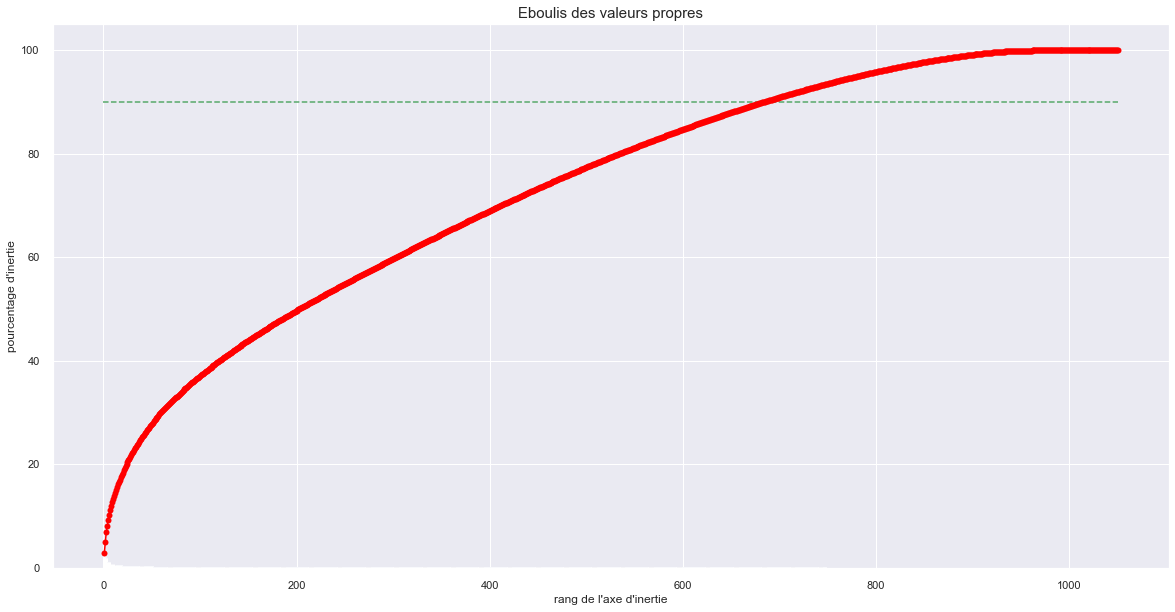

In [73]:
plt.figure(figsize=(20, 10))
plt.bar(np.arange(len(scree)) + 1, scree)
plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres", fontsize=15)
plt.hlines(90, xmin=0, xmax=1050, color='g', linestyles='dashed')
plt.show(block=False)

In [74]:
X_tfidf

,_blk analog,_g analog,_g online,_w analog,_w online,aa batteries,aa pencil,aaa battery,aapno rajasthan,aari embroidered,...,zipper brand,zippered compartment,zone pillow,zone printed,zone uv,zoom type,zora laptop,zyxel ba,zyxel data,zyxel pla
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


truncatedSVD?? NMF

In [75]:
mask = scree.cumsum() > 90
nb_selected_features = len(scree[~mask]) + 1
print("Number of selected features:", nb_selected_features)

Number of selected features: 685


In [76]:
tfidf_matrix3.max()

_blk analog    0.101701
_g analog      0.465338
_g online      0.232669
_w analog      0.465338
_w online      0.232669
                 ...   
zoom type      0.081765
zora laptop    0.344320
zyxel ba       0.365024
zyxel data     0.471138
zyxel pla      0.526053
Length: 17756, dtype: float64

In [77]:
tfidf_matrix3.shape

(1050, 17756)

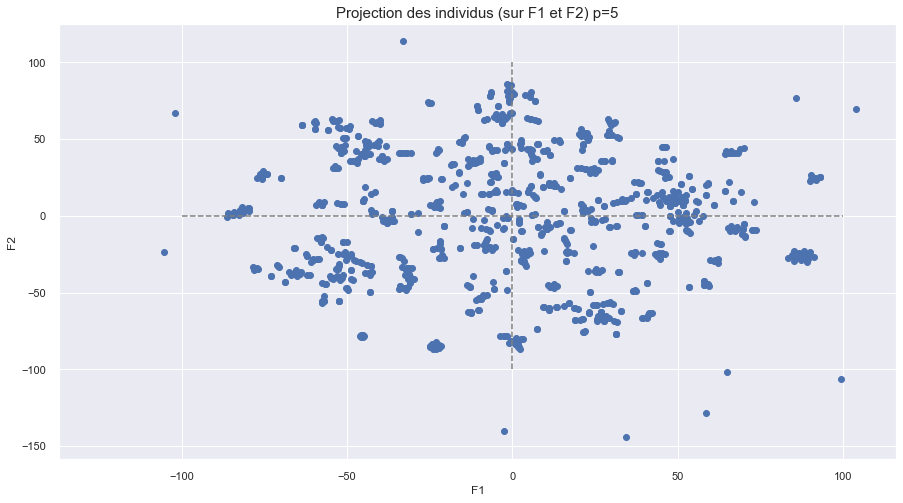

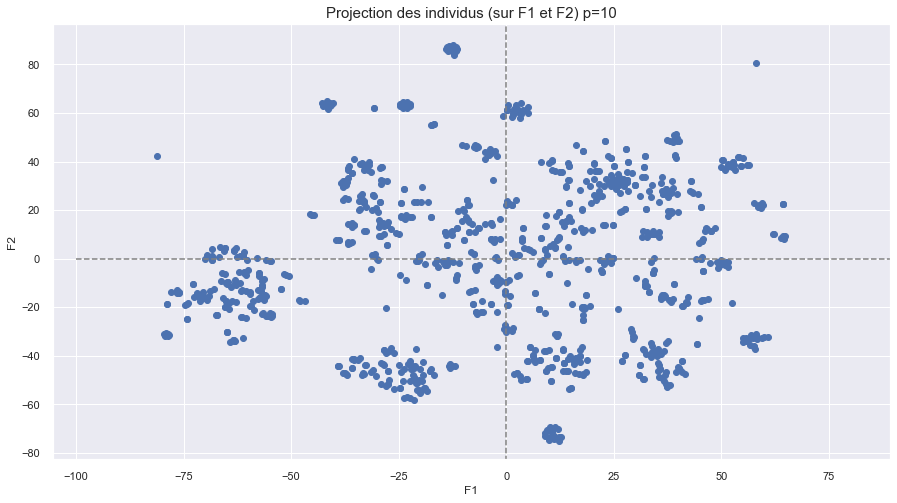

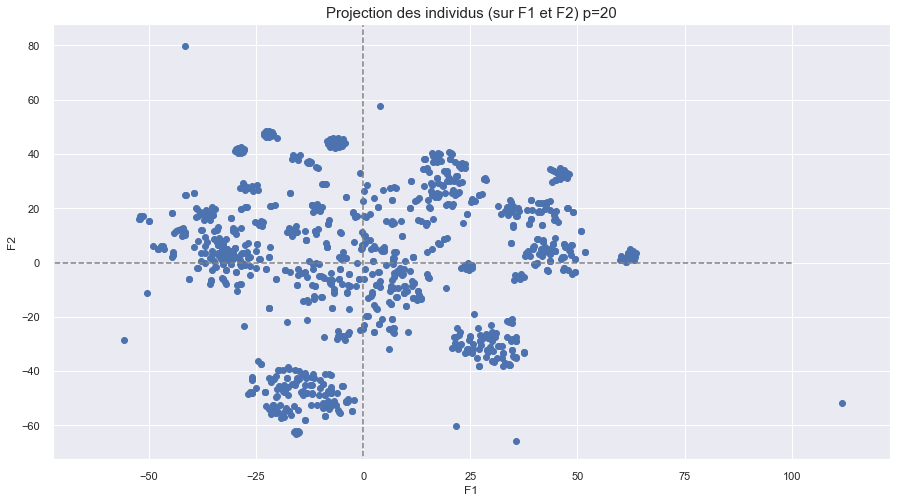

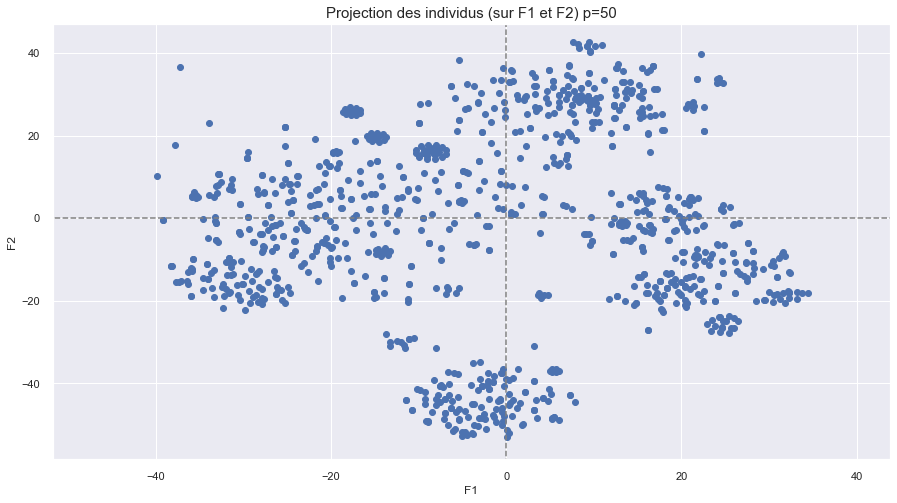

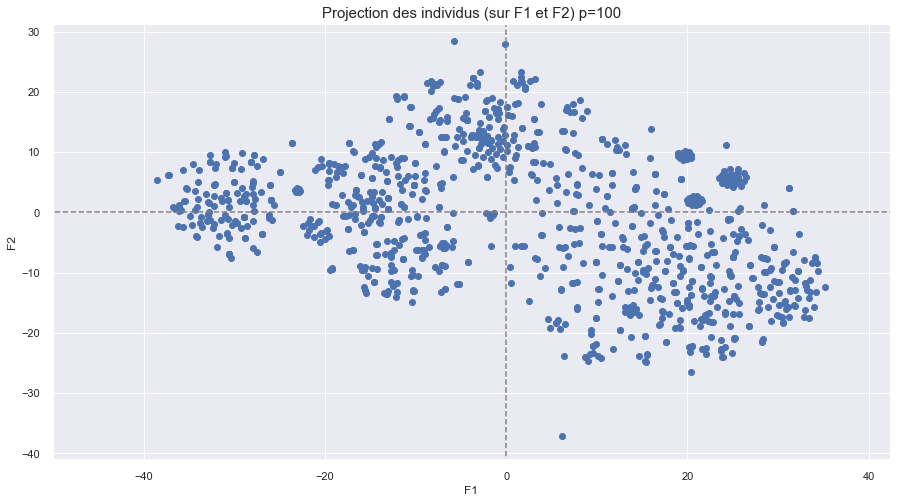

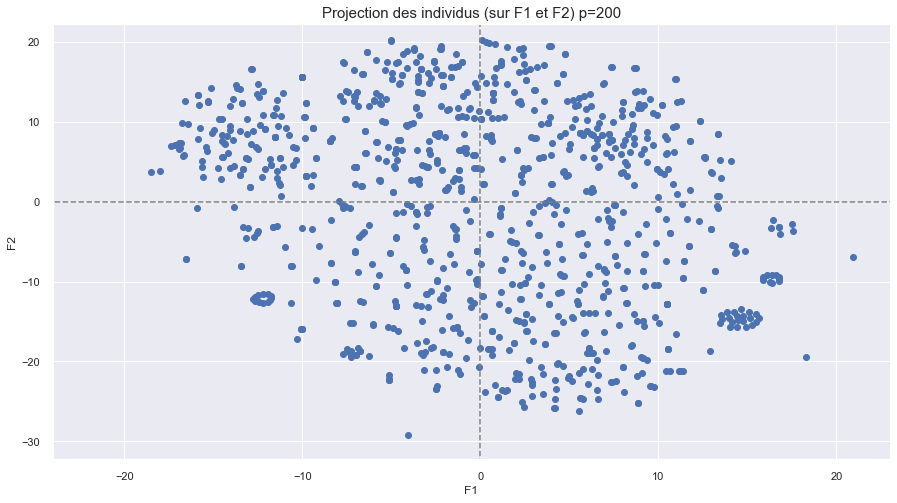

In [78]:
for perplex in [5, 10, 20, 50, 100, 200]:
    tsne = manifold.TSNE(
            n_components=2,  # for projection in a plane
            perplexity=perplex,
            random_state=0
        )

    X_tsne = tsne.fit_transform(X_tfidf)

    fig = plt.figure(figsize=(15, 8))

    plt.scatter(
        X_tsne[:, 0],
        X_tsne[:, 1]
    )
    
#     ax = plt.gca()  # ax = ax or plt.gca()
#         # Set dimensions of the figure (if no axes is passed)
#     plt.gcf().set_figwidth(12)
#     plt.gcf().set_figheight(7)
    
#     color = df.main_cate.nunique()
#     ax.scatter(
#         X_tsne[:, 0],  # x-coordinate
#         X_tsne[:, 1],  # y-coordinate
#         c=color,  # base for coloration of points
#         cmap=plt.cm.get_cmap('Set1'),  # colormap
#         )

    # détermination des limites du graphique
    boundary_right = np.max(np.abs(X_tsne[:, 0])) * 1.1
    boundary_left = np.min(X_tsne[:, 0]) * 1.3
    boundary_up = np.max(X_tsne[:, 1]) * 1.1
    boundary_down = np.min(X_tsne[:, 1]) * 1.1
    plt.xlim([boundary_left, boundary_right])
    plt.ylim([boundary_down, boundary_up])

    # affichage des lignes horizontales et verticales
    plt.plot([-100, 100], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-100, 100], color='grey', ls='--')

    # nom des axes, avec le pourcentage d'inertie expliquée
    plt.xlabel('F1')
    plt.ylabel('F2')

    plt.title(f"Projection des individus (sur F1 et F2) p={perplex}",
              fontsize=15)
    plt.show(block=False)

In [79]:
def plot_clusters(
        standardized_features,
        clusters_labels,
        embedding_algo='tSNE',
        ax=None):
    """
    Arguments:
    ---------
    embedding_algo: 'tSNE' or 'PCA' or 'Isomap'
    """

    # Applying the embedding
    # -----------------
    # Import libraries
    from sklearn import manifold
    from sklearn import decomposition

    # Instanciation of the embedding
    if embedding_algo == 'tSNE':
        X_projected = X_tsne

    elif embedding_algo == 'Isomap':
        X_projected = X_isomap

    elif embedding_algo == 'PCA':
        X_projected = X_pca

    # Plotting the Isomap embedding
    # -----------------------------

    # If no axes is passed…
    if not ax:
        # Set the axes to the current one
        ax = plt.gca()  # ax = ax or plt.gca()
        # Set dimensions of the figure (if no axes is passed)
        plt.gcf().set_figwidth(12)
        plt.gcf().set_figheight(7)

    # Definitions of axis boundaries
    ax.set_xlim(X_projected[:, 0].min()*1.1, X_projected[:, 0].max()*1.1)
    ax.set_ylim(X_projected[:, 1].min()*1.1, X_projected[:, 1].max()*1.1)

    # Properties of the axes
    ax.set_title(embedding_algo, fontsize=20)

    if embedding_algo == 'PCA':
        # Names of x- and y- axis, with percentage of explained variance
        ax.set_xlabel('First component ({}%)'
                      .format(round(100*pca.explained_variance_ratio_[0], 1)))
        ax.set_ylabel('Second component ({}%)'
                      .format(round(100*pca.explained_variance_ratio_[1], 1)))
    else:
        ax.set_xlabel('First component')
        ax.set_ylabel('Second component')

    # Setting color
    NB_CLUSTERS = \
        len(set(clusters_labels)) - (1 if -1 in clusters_labels else 0)
    color = clusters_labels / NB_CLUSTERS

    # Setting color to black for noise points
    # color = pd.Series(clusters_labels / NB_CLUSTERS).astype('object')
    # color = color.map(lambda x: x if x != (-1 / NB_CLUSTERS) else 'black')

    # Plotting the scatter plot
    ax.scatter(
            X_projected[:, 0],  # x-coordinate
            X_projected[:, 1],  # y-coordinate
            c=color,  # base for coloration of points
            cmap=plt.cm.get_cmap('Set1'),  # colormap
            )

In [80]:
class GridSearch(BaseEstimator):
    """Classe permettant d'implémenter une recherche exhaustive sur grille
    (sans validation croisée) pour les algorithmes de clustering."""

    # Method: init
    # ------------------------------------------------------------------------------
    def __init__(
            self,
            estimator,  # clustering algorithm to test
            param_grid,  # research space for hyperparameters
            scoring=None):
        """Méthode d'initialisation prenant en entrée le modèle
        à tester et la grille de paramètres."""

        # getting parameters
        self.estimator = estimator
        self.param_grid = param_grid
        self.scoring = scoring

    # Method: fit
    # ------------------------------------------------------------------------------
    def fit(self, X):
        """Méthode permettant de réaliser la recherche sur grille,
        et renvoyant le meilleur modèle trouvé, ré-entraîné sur les données."""

        # initialization of the dict of results
        self.results_ = {"scores": [],
                         "params": [],
                         "models": [],
                         "fit_times": [],
                         "nb_clusters": [],
                         "gini_coef": [],
                         "davies_bouldin": []}

        # Loading modules
        from sklearn.model_selection import ParameterGrid

        # iterating upon all combinations of parameters
        for param_combination in ParameterGrid(param_grid):

            # instanciation of the model with selected parameters
            model = self.estimator(**param_combination)

            # Measuring training time while fitting the model on the data
            time_train = %timeit -n1 -r1 -o -q model.fit(X)
            time_train = time_train.average

            # Scoring the model
            if not self.scoring:  # if scoring parameter not defined
                model_score = model.score(X)
            else:  # if scoring parameter is defined
                try:
                    labels = model.labels_
                    model_score = self.scoring(X, labels)
                except model_score.DoesNotExist:
                    model_score = np.nan

            # Computing number of clusters, excluding noise (#-1)
            nb_clusters = \
                len(set(model.labels_)) - (1 if -1 in clusters_labels else 0)
            nb_clusters = int(nb_clusters)

            # Computing Gini coefficient
            gini_coeff = p5Lib.gini(model.labels_)

            from sklearn import metrics
            # Computing Davies Bouldin index
            davies_bouldin = metrics.davies_bouldin_score(X, labels)

            # saving results, parameters and models in a dict
            self.results_["scores"].append(model_score)  # scores
            self.results_["params"].append(param_combination)  # parameters
            self.results_["models"].append(model)  # trained models
            self.results_["fit_times"].append(time_train)  # training time
            self.results_["gini_coef"].append(gini_coeff)  # Gini coefficient
            self.results_["nb_clusters"].append(nb_clusters)  # nb of clusters
            self.results_["davies_bouldin"].append(davies_bouldin)

        # Selecting best model (assumes that 'greater is better')
        # -----------------------------------
        best_model_index, best_score = None, None  # initialisation
        # iterating over scores
        for index, score in enumerate(self.results_["scores"]):

            # initialisation
            if not best_score:
                best_score = score
                best_model_index = index

            # if score is better than current best_score
            if score > best_score:
                # update the current best_score and current best_model_index
                best_score = score
                best_model_index = index

        # Update attributes of the instance
        self.best_score_ = self.results_["scores"][best_model_index]
        self.best_params_ = self.results_["params"][best_model_index]
        self.best_estimator_ = self.results_["models"][best_model_index]
        self.best_index_ = best_model_index
        self.refit_time_ = self.results_["fit_times"][best_model_index]

        return self

    # Method: predict
    # ------------------------------------------------------------------------------
    def predict(self, X_test):
        """Méthode permettant de réaliser les prédictions sur le jeu de test,
        en utilisant le meilleur modèle trouvé avec la méthode .fit
        entraîné sur le jeu d'entraînement complet."""

        # use the .predict method of the estimator on the best model
        return self.best_model.predict(X_test)

In [81]:
def clustering_plots(algorithm_name, standardized_features, clusters_labels):

    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    fig = plt.figure()

    # Set properties of the figure
    fig.set_figheight(6)
    fig.set_figwidth(23)
    fig.suptitle('Visualisation of clustering with {}'
                 .format(algorithm_name), fontsize=20)

    # Set the geometry of the grid of subplots
    gs = gridspec.GridSpec(nrows=1, ncols=3,)

    # Initialize axes and set position (left to right, top to bottom)
    # Use sharex or sharey parameter for sharing axis
    ax1 = fig.add_subplot(gs[0])

    # Filling the axes
    plot_clusters(
        standardized_features,
        clusters_labels,
        embedding_algo='tSNE',
        ax=ax1
    )

    # Automatically adjusts subplots params to fit the figure
    gs.tight_layout(fig, rect=[0, 0, 1, 0.96])

In [82]:
tsne = manifold.TSNE(
            n_components=2,  # for projection in a plane
            perplexity=50,
            random_state=0
        )

## K-means

In [83]:
standardized_features = X_tfidf
clusters_labels = np.random.randint(2, size=len(standardized_features))

In [84]:
param_grid = {
    "n_clusters":  range(2, 14),  # number of clusters
}

In [85]:
kmeans_search = GridSearch(
    estimator=cluster.KMeans,
    param_grid=param_grid,
    scoring=silhouette_score,
)

# Proceeding the grid search
kmeans_search.fit(X_tfidf)

# Displays best parameters
print("Best hyperparameters:", kmeans_search.best_params_)
print("Best Silhouette score:", kmeans_search.best_score_)
print("Training time:", kmeans_search.refit_time_)

Best hyperparameters: {'n_clusters': 8}
Best Silhouette score: 0.0588326174445525
Training time: 4.232173999999986


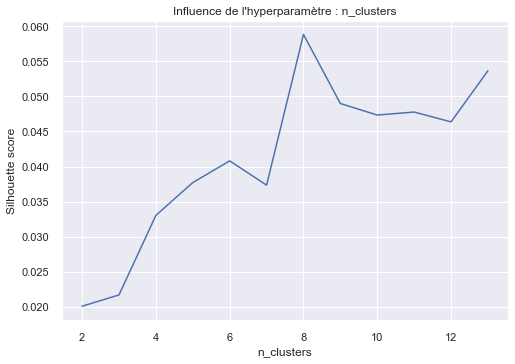

In [86]:
# Getting the list of parameters and list of scores
n_clusters_list = [kmeans_search.results_['params'][i]['n_clusters']
                   for i in range(len(kmeans_search.results_['params']))]
scores_list = kmeans_search.results_['scores']

# Plotting the influence of the single hyperparameter
x = n_clusters_list
y = scores_list
plt.xlabel("n_clusters")
plt.ylabel("Silhouette score")
plt.title("Influence de l'hyperparamètre : n_clusters")
plt.plot(x, y)

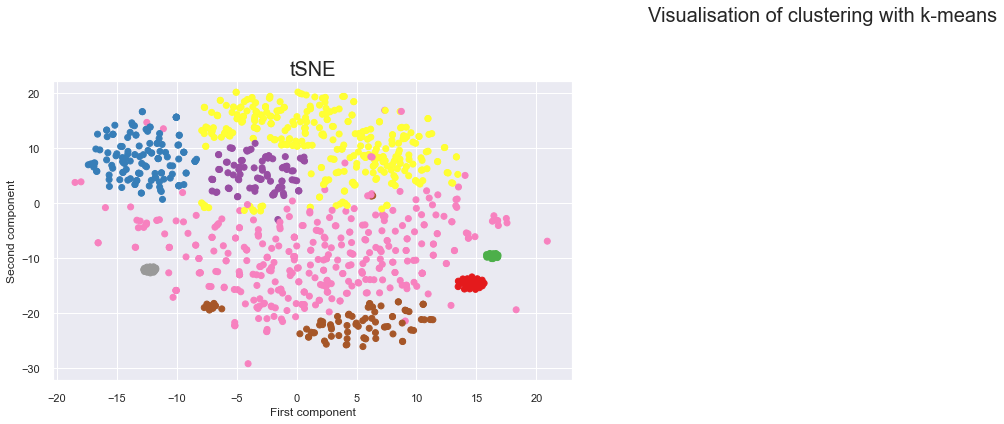

In [87]:
# Setup for call to the clustering_plots function
algorithm_name = 'k-means'
standardized_features = X_tfidf
clusters_labels = kmeans_search.best_estimator_.labels_

clustering_plots(algorithm_name, standardized_features, clusters_labels)

In [88]:
tfidf4 = TfidfVectorizer(stop_words=stop_words,ngram_range=(3,3))
x4 = tfidf4.fit_transform(desc_noPrentheses_noDigit3)
features_names4 = tfidf4.get_feature_names()
dense4 = x4.todense()
denselist4 = dense4.tolist()
tfidf_matrix4 = pd.DataFrame(denselist4, columns=features_names4)

In [89]:
tfidf_matrix4.shape

(1050, 22598)

In [90]:
standardized_features = tfidf_matrix4
clusters_labels = np.random.randint(2, size=len(standardized_features))

In [91]:
param_grid = {
    "n_clusters":  range(2, 10),  # number of clusters
}

In [92]:
kmeans_search = GridSearch(
    estimator=cluster.KMeans,
    param_grid=param_grid,
    scoring=silhouette_score,
)

# Proceeding the grid search
kmeans_search.fit(X_tfidf)

# Displays best parameters
print("Best hyperparameters:", kmeans_search.best_params_)
print("Best Silhouette score:", kmeans_search.best_score_)
print("Training time:", kmeans_search.refit_time_)

Best hyperparameters: {'n_clusters': 8}
Best Silhouette score: 0.05132051434711672
Training time: 4.363880300000005


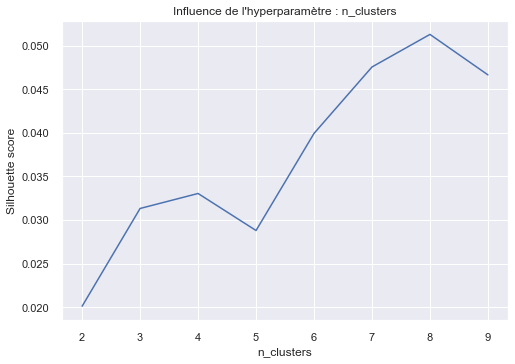

In [93]:
# Getting the list of parameters and list of scores
n_clusters_list = [kmeans_search.results_['params'][i]['n_clusters']
                   for i in range(len(kmeans_search.results_['params']))]
scores_list = kmeans_search.results_['scores']

# Plotting the influence of the single hyperparameter
x = n_clusters_list
y = scores_list
plt.xlabel("n_clusters")
plt.ylabel("Silhouette score")
plt.title("Influence de l'hyperparamètre : n_clusters")
plt.plot(x, y)

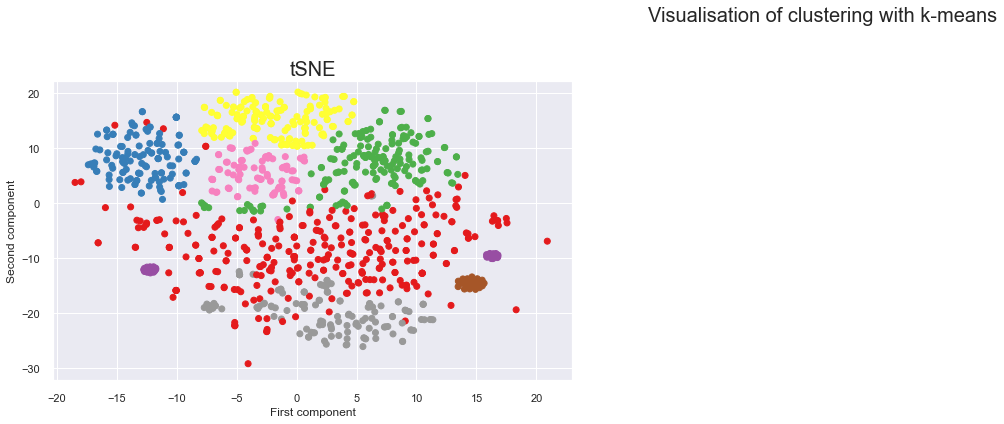

In [94]:
# Setup for call to the clustering_plots function
algorithm_name = 'k-means'
standardized_features = X_tfidf
clusters_labels = kmeans_search.best_estimator_.labels_

clustering_plots(algorithm_name, standardized_features, clusters_labels)

In [95]:
standardized_features = tfidf_matrix
clusters_labels = np.random.randint(2, size=len(standardized_features))

In [96]:
param_grid = {
    "n_clusters":  range(2, 10),  # number of clusters
}

In [97]:
kmeans_search = GridSearch(
    estimator=cluster.KMeans,
    param_grid=param_grid,
    scoring=silhouette_score,
)

# Proceeding the grid search
kmeans_search.fit(X_tfidf)

# Displays best parameters
print("Best hyperparameters:", kmeans_search.best_params_)
print("Best Silhouette score:", kmeans_search.best_score_)
print("Training time:", kmeans_search.refit_time_)

Best hyperparameters: {'n_clusters': 8}
Best Silhouette score: 0.04624211919029542
Training time: 4.3320818999999915


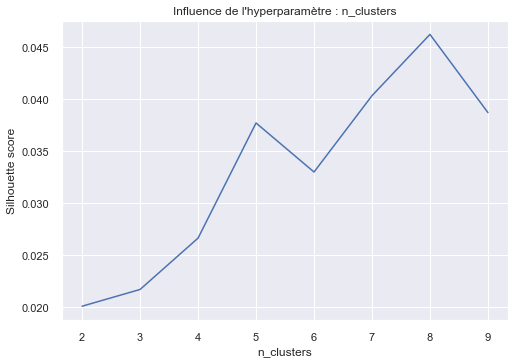

In [98]:
# Getting the list of parameters and list of scores
n_clusters_list = [kmeans_search.results_['params'][i]['n_clusters']
                   for i in range(len(kmeans_search.results_['params']))]
scores_list = kmeans_search.results_['scores']

# Plotting the influence of the single hyperparameter
x = n_clusters_list
y = scores_list
plt.xlabel("n_clusters")
plt.ylabel("Silhouette score")
plt.title("Influence de l'hyperparamètre : n_clusters")
plt.plot(x, y)

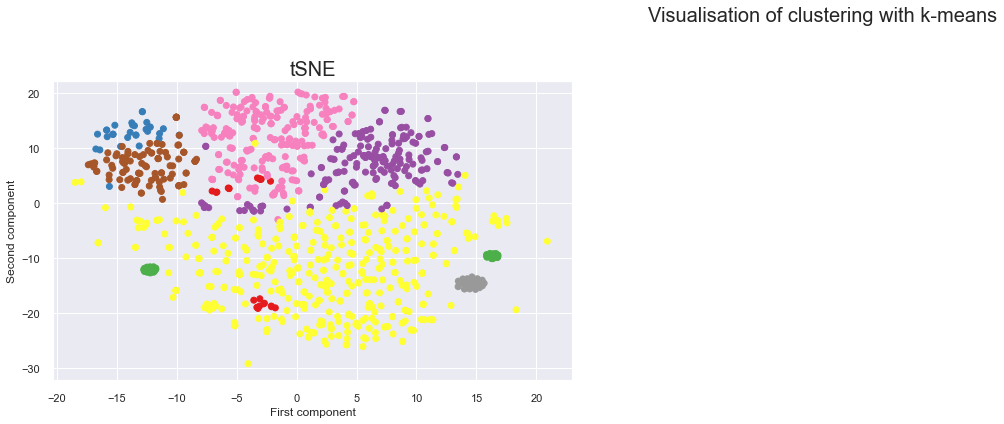

In [99]:
# Setup for call to the clustering_plots function
algorithm_name = 'k-means'
standardized_features = X_tfidf
clusters_labels = kmeans_search.best_estimator_.labels_

clustering_plots(algorithm_name, standardized_features, clusters_labels)